<a href="https://colab.research.google.com/github/gu1lleom/Colab-Clases/blob/main/DM_Clase_08_Conjuntos_de_datos_desbalanceados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -U -q imbalanced-learn

     |████████████████████████████████| 199 kB 5.2 MB/s 


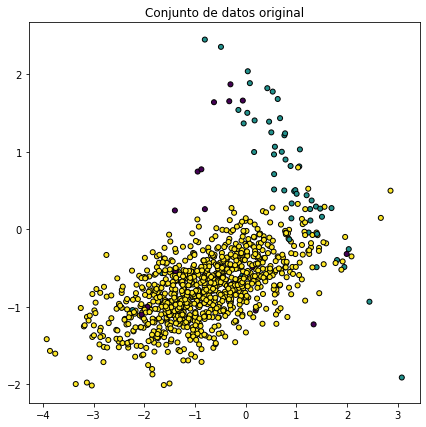

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1, weights=[0.01, 0.05, 0.94], class_sep=0.8, random_state=42)

plt.figure(figsize=(7, 7))
plt.title("Conjunto de datos original")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k");

# Métodos de submuestreo

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks

## Submuestro por centroides de clusters

In [ ]:
cc = ClusterCentroids(sampling_strategy='majority', random_state=42)

X_res, y_res  = cc.fit_resample(X, y)

print(Counter(y), '-->', Counter(y_res))

Counter({2: 932, 1: 53, 0: 15}) --> Counter({1: 53, 0: 15, 2: 15})


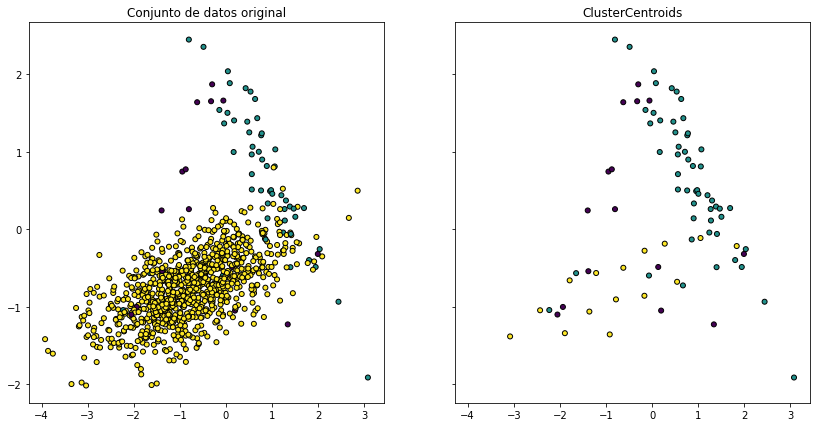

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 7))
ax1.set_title("Conjunto de datos original")
ax1.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
ax2.set_title("ClusterCentroids")
ax2.scatter(X_res[:, 0], X_res[:, 1], marker="o", c=y_res, s=25, edgecolor="k");

## Submuestreo al azar

In [ ]:
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)

X_res, y_res = rus.fit_resample(X, y)

print(Counter(y), '-->', Counter(y_res))

Counter({2: 932, 1: 53, 0: 15}) --> Counter({1: 53, 0: 15, 2: 15})


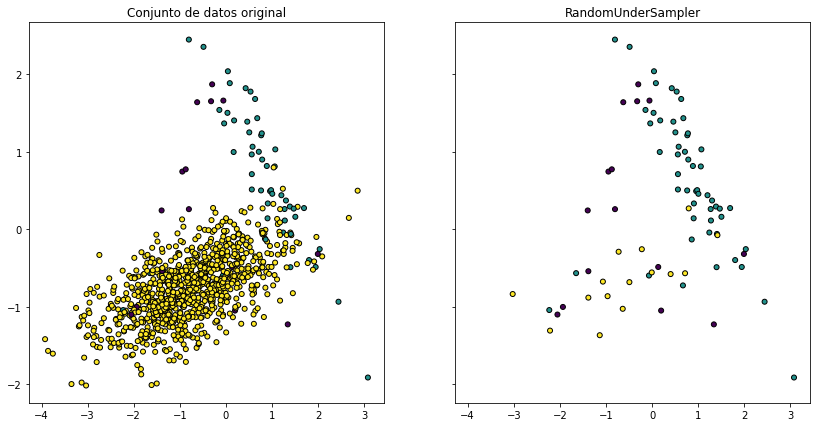

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 7))
ax1.set_title("Conjunto de datos original")
ax1.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
ax2.set_title("RandomUnderSampler")
ax2.scatter(X_res[:, 0], X_res[:, 1], marker="o", c=y_res, s=25, edgecolor="k");

## Submuestreo NearMiss

In [ ]:
nm1 = NearMiss(sampling_strategy='majority', version=1)
X_res_1,  y_res_1 = nm1.fit_resample(X, y)
print(Counter(y), '-->', Counter(y_res_1))

nm2 = NearMiss(sampling_strategy='majority', version=2)
X_res_2,  y_res_2 = nm2.fit_resample(X, y)
print(Counter(y), '-->', Counter(y_res_2))


nm3 = NearMiss(sampling_strategy='majority', version=3)
X_res_3,  y_res_3 = nm3.fit_resample(X, y)

print(Counter(y), '-->', Counter(y_res_3))

Counter({2: 932, 1: 53, 0: 15}) --> Counter({1: 53, 0: 15, 2: 15})
Counter({2: 932, 1: 53, 0: 15}) --> Counter({1: 53, 0: 15, 2: 15})
Counter({2: 932, 1: 53, 0: 15}) --> Counter({1: 53, 0: 15, 2: 15})


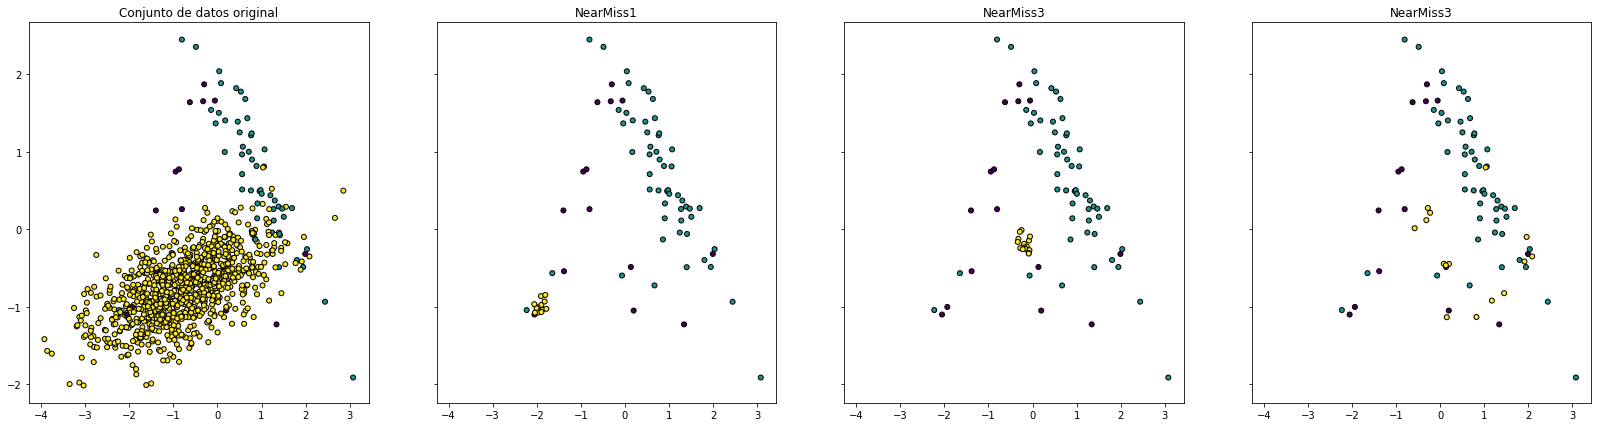

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(28, 7))
ax1.set_title("Conjunto de datos original")
ax1.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
ax2.set_title("NearMiss1")
ax2.scatter(X_res_1[:, 0], X_res_1[:, 1], marker="o", c=y_res_1, s=25, edgecolor="k");
ax3.set_title("NearMiss3")
ax3.scatter(X_res_2[:, 0], X_res_2[:, 1], marker="o", c=y_res_2, s=25, edgecolor="k");
ax4.set_title("NearMiss3")
ax4.scatter(X_res_3[:, 0], X_res_3[:, 1], marker="o", c=y_res_3, s=25, edgecolor="k");

## Enlaces Tomek

In [ ]:
tl = TomekLinks(sampling_strategy='majority')

X_res,  y_res = tl.fit_resample(X, y)

print(Counter(y), '-->', Counter(y_res))

Counter({2: 932, 1: 53, 0: 15}) --> Counter({2: 917, 1: 53, 0: 15})


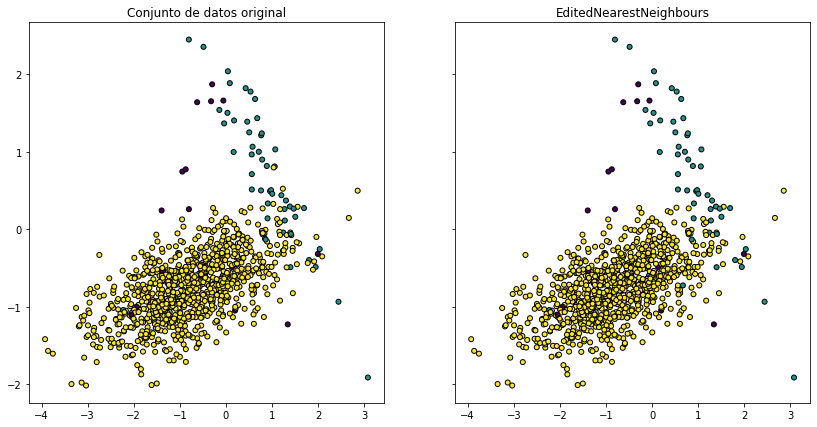

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 7))
ax1.set_title("Conjunto de datos original")
ax1.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
ax2.set_title("EditedNearestNeighbours")
ax2.scatter(X_res[:, 0], X_res[:, 1], marker="o", c=y_res, s=25, edgecolor="k");

## Submuestro por vecinos cercanos editados

In [ ]:
enn = EditedNearestNeighbours(sampling_strategy='majority')

X_res,  y_res = enn.fit_resample(X, y)

print(Counter(y), '-->', Counter(y_res))

Counter({2: 932, 1: 53, 0: 15}) --> Counter({2: 879, 1: 53, 0: 15})


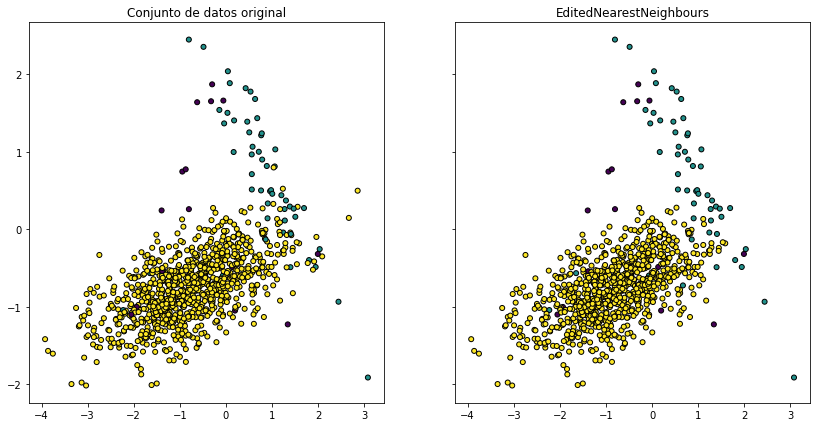

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 7))
ax1.set_title("Conjunto de datos original")
ax1.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
ax2.set_title("EditedNearestNeighbours")
ax2.scatter(X_res[:, 0], X_res[:, 1], marker="o", c=y_res, s=25, edgecolor="k");

## Submuestreo vecinos cercanos condensados

In [ ]:
cnn = CondensedNearestNeighbour(random_state=42)

X_res,  y_res = cnn.fit_resample(X, y)

print(Counter(y), '-->', Counter(y_res))

Counter({2: 932, 1: 53, 0: 15}) --> Counter({2: 41, 0: 15, 1: 14})


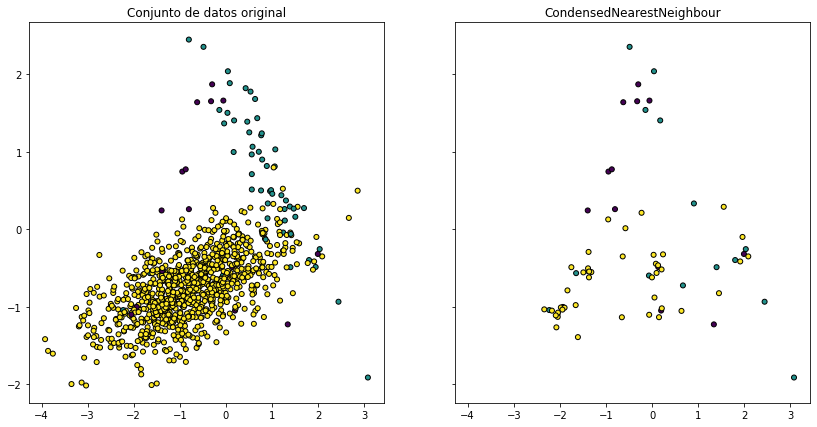

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 7))
ax1.set_title("Conjunto de datos original")
ax1.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
ax2.set_title("CondensedNearestNeighbour")
ax2.scatter(X_res[:, 0], X_res[:, 1], marker="o", c=y_res, s=25, edgecolor="k");

# Métodos de sobremuestreo

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

## Sobremuestreo al azar

In [ ]:
ros = RandomOverSampler(random_state=0, shrinkage=0.1)
X_res, y_res = ros.fit_resample(X, y)

print(Counter(y), '-->', Counter(y_res))

Counter({2: 932, 1: 53, 0: 15}) --> Counter({2: 932, 1: 932, 0: 932})


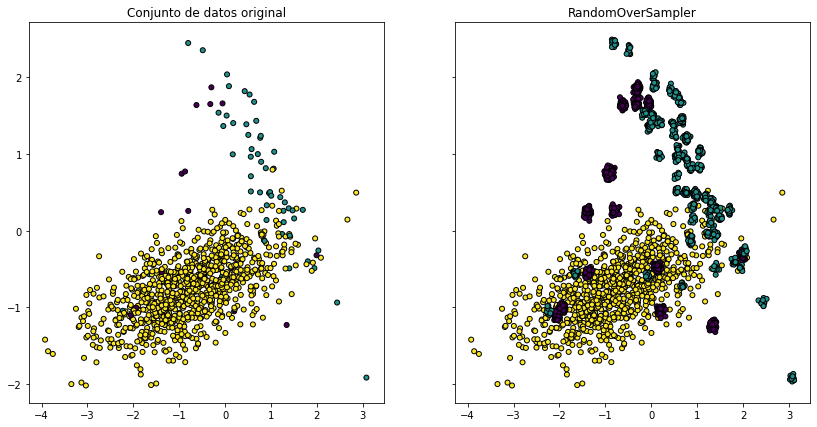

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 7))
ax1.set_title("Conjunto de datos original")
ax1.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
ax2.set_title("RandomOverSampler")
ax2.scatter(X_res[:, 0], X_res[:, 1], marker="o", c=y_res, s=25, edgecolor="k");

## Sobremuestreo SMOTE

In [ ]:
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

print(Counter(y), '-->', Counter(y_res))

Counter({2: 932, 1: 53, 0: 15}) --> Counter({2: 932, 1: 932, 0: 932})


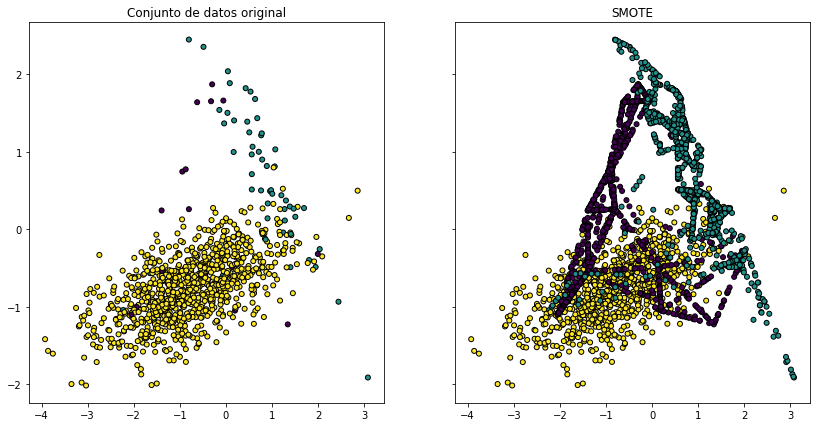

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 7))
ax1.set_title("Conjunto de datos original")
ax1.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
ax2.set_title("SMOTE")
ax2.scatter(X_res[:, 0], X_res[:, 1], marker="o", c=y_res, s=25, edgecolor="k");

## Sobremuestreo ADASYN

In [ ]:
smote = ADASYN()
X_res, y_res = smote.fit_resample(X, y)

print(Counter(y), '-->', Counter(y_res))

Counter({2: 932, 1: 53, 0: 15}) --> Counter({2: 932, 0: 930, 1: 928})


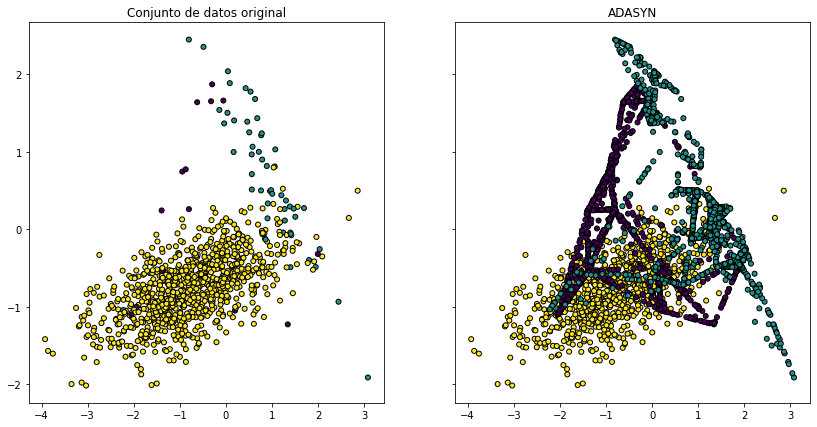

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 7))
ax1.set_title("Conjunto de datos original")
ax1.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
ax2.set_title("ADASYN")
ax2.scatter(X_res[:, 0], X_res[:, 1], marker="o", c=y_res, s=25, edgecolor="k");